In [17]:
!pip install opencv-python

     |████████████████████████████████| 27.9 MB 8.1 MB/s            


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D ,MaxPooling2D
from sklearn.metrics import confusion_matrix
%matplotlib inline
from cf_matrix import make_confusion_matrix
sns.set_context('talk')

In [6]:
train_path = 'data/train/'
test_path = 'data/test/'


In [7]:
train_df = pd.read_csv('data/train.txt', sep=" ", header=None)
train_df.columns=['id', 'file_paths', 'labels', 'data source']
train_df=train_df.drop(['id', 'data source'], axis=1)


In [8]:
size = train_df.shape[0]
sample=10400/size
post_sample=400/10400
post_sample2=1000/10000


In [9]:
train_df = train_df.sample(frac=sample,replace=True, random_state=1,ignore_index=True)


In [10]:
IMG_SIZE = 250
X=[]
img=0
for file in train_df.file_paths:
    img=cv2.imread(f'{train_path}/{file}',cv2.IMREAD_GRAYSCALE)
    new_img=cv2.resize(img,(IMG_SIZE, IMG_SIZE))
    new_img=new_img/255.0
    X.append(new_img)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = train_df['labels'].map({'negative':0, 'positive':1}).to_numpy().reshape(-1, 1)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=post_sample, random_state=255)


In [12]:

model = Sequential()
model.add(Conv2D(64, (9, 9), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(32, (6, 6)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
n=20


In [14]:
history = model.fit(X_train, y_train, epochs=n ,batch_size=32,verbose=1, validation_split=post_sample2, shuffle = True, use_multiprocessing=True)


2021-12-09 04:48:33.755268: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-09 04:48:33.763119: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
282/282 [==============================] - ETA: 0s - loss: 0.5662 - accuracy: 0.6674WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x14a1fa790> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSIT

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 64)      5248      
_________________________________________________________________
activation (Activation)      (None, 242, 242, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        73760     
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 16)        4

In [16]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


13/13 - 4s - loss: 0.2648 - accuracy: 0.9175


In [17]:
def accur():

    print('\nTest accuracy:', test_acc ,"\n")

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(n)

    plt.figure(figsize=(16,9))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()



Test accuracy: 0.9175000190734863 



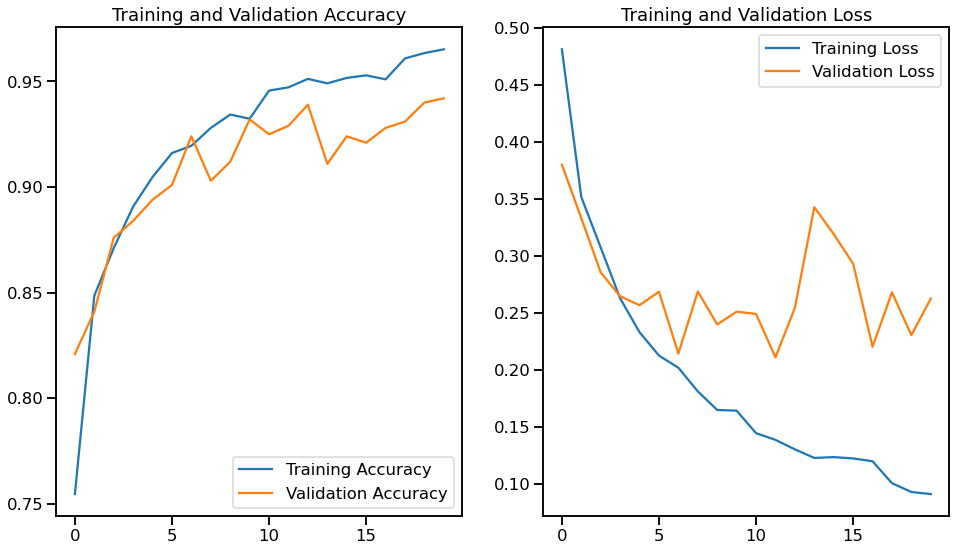

In [18]:
accur()
